# Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/lai_h/Documents/GitHub/Capstone-Private-/dataset/edstays3.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,disposition_binary,admitted,difftime,nights,hours,discharge_hour,admission_hour,admission_date,admission_day,admission_day_of_week,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,seq_num,icd_code,icd_version,icd_title
0,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0,1,0 days 04:13:00,0,4.2,23,19,2180-06-05,5,0,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",1,5728,9,"OTH SEQUELA, CHR LIV DIS"
1,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0,1,0 days 04:13:00,0,4.2,23,19,2180-06-05,5,0,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",2,78959,9,OTHER ASCITES
2,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0,1,0 days 04:13:00,0,4.2,23,19,2180-06-05,5,0,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",3,7070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC COMA
3,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0,1,0 days 04:13:00,0,4.2,23,19,2180-06-05,5,0,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4,V08,9,ASYMPTOMATIC HIV INFECTION
4,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,0,1,0 days 05:37:00,0,5.6,21,15,2180-06-26,26,0,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention,1,78959,9,OTHER ASCITES


In [4]:
# remove unnecessary columns for the model
# remove subject_id, hadm_id, stay_id, intime, outtime, admission_date
df1 = df.drop(['subject_id', 'hadm_id', 'stay_id', 'intime', 'outtime', 'admission_date', 'disposition'], axis=1)
df1.dropna(inplace=True)
df1.shape
# only include the last row for each patient
# df2 = df1.groupby('icustay_id', 'stay_id').last()

(863493, 25)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863493 entries, 0 to 946690
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   gender                 863493 non-null  object 
 1   race                   863493 non-null  object 
 2   arrival_transport      863493 non-null  object 
 3   disposition_binary     863493 non-null  int64  
 4   admitted               863493 non-null  int64  
 5   difftime               863493 non-null  object 
 6   nights                 863493 non-null  int64  
 7   hours                  863493 non-null  float64
 8   discharge_hour         863493 non-null  int64  
 9   admission_hour         863493 non-null  int64  
 10  admission_day          863493 non-null  int64  
 11  admission_day_of_week  863493 non-null  int64  
 12  temperature            863493 non-null  float64
 13  heartrate              863493 non-null  float64
 14  resprate               863493 non-nu

# Initial Modelling with Traditional ML

In [6]:
# let's use primary features for testing the model performance first
# Later model will be built with all features (including nlp features on text data)
# drop text columns: chiefcomplaint, icd_title
df2 = df1.drop(['chiefcomplaint', 'icd_title', 'difftime', "pain", "icd_code"], axis=1)
df2.head()

,gender,race,arrival_transport,disposition_binary,admitted,nights,hours,discharge_hour,admission_hour,admission_day,admission_day_of_week,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,seq_num,icd_version
0,F,WHITE,AMBULANCE,0,1,0,4.2,23,19,5,0,98.4,70.0,16.0,97.0,106.0,63.0,3.0,1,9
1,F,WHITE,AMBULANCE,0,1,0,4.2,23,19,5,0,98.4,70.0,16.0,97.0,106.0,63.0,3.0,2,9
2,F,WHITE,AMBULANCE,0,1,0,4.2,23,19,5,0,98.4,70.0,16.0,97.0,106.0,63.0,3.0,3,9
3,F,WHITE,AMBULANCE,0,1,0,4.2,23,19,5,0,98.4,70.0,16.0,97.0,106.0,63.0,3.0,4,9
4,F,WHITE,AMBULANCE,0,1,0,5.6,21,15,26,0,98.9,88.0,18.0,97.0,116.0,88.0,3.0,1,9


In [7]:
# data split
from sklearn.model_selection import train_test_split
X = df2.drop('disposition_binary', axis=1)
y = df2['disposition_binary']


# apply encoding to categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

X['admitted'] = X['admitted'].astype('bool')

# select the columns to scale 
columns_to_scale = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
columns_to_encode = ["race", "gender", "arrival_transport", "admitted"]

# apply the scaler to the selected columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# apply the encoder to the selected columns 
X = pd.get_dummies(X, columns=columns_to_encode)

In [8]:
X.head()

,nights,hours,discharge_hour,admission_hour,admission_day,admission_day_of_week,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,seq_num,icd_version,race_AMERICAN INDIAN/ALASKA NATIVE,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,race_ASIAN - SOUTH EAST ASIAN,race_BLACK/AFRICAN,race_BLACK/AFRICAN AMERICAN,race_BLACK/CAPE VERDEAN,race_BLACK/CARIBBEAN ISLAND,race_HISPANIC OR LATINO,race_HISPANIC/LATINO - CENTRAL AMERICAN,race_HISPANIC/LATINO - COLUMBIAN,race_HISPANIC/LATINO - CUBAN,race_HISPANIC/LATINO - DOMINICAN,race_HISPANIC/LATINO - GUATEMALAN,race_HISPANIC/LATINO - HONDURAN,race_HISPANIC/LATINO - MEXICAN,race_HISPANIC/LATINO - PUERTO RICAN,race_HISPANIC/LATINO - SALVADORAN,race_MULTIPLE RACE/ETHNICITY,race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,race_OTHER,race_PATIENT DECLINED TO ANSWER,race_PORTUGUESE,race_SOUTH AMERICAN,race_UNABLE TO OBTAIN,race_UNKNOWN,race_WHITE,race_WHITE - BRAZILIAN,race_WHITE - EASTERN EUROPEAN,race_WHITE - OTHER EUROPEAN,race_WHITE - RUSSIAN,gender_F,gender_M,arrival_transport_AMBULANCE,arrival_transport_HELICOPTER,arrival_transport_OTHER,arrival_transport_UNKNOWN,arrival_transport_WALK IN,admitted_False,admitted_True
0,0.000429,-0.002941,1.351941,0.946111,-1.219895,-1.494487,0.106442,-0.831491,-0.069993,-0.068296,-0.725290,-0.017335,0.523219,-0.800812,-1.037407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
1,0.000429,-0.002941,1.351941,0.946111,-1.219895,-1.494487,0.106442,-0.831491,-0.069993,-0.068296,-0.725290,-0.017335,0.523219,0.070838,-1.037407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
2,0.000429,-0.002941,1.351941,0.946111,-1.219895,-1.494487,0.106442,-0.831491,-0.069993,-0.068296,-0.725290,-0.017335,0.523219,0.942488,-1.037407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
3,0.000429,-0.002941,1.351941,0.946111,-1.219895,-1.494487,0.106442,-0.831491,-0.069993,-0.068296,-0.725290,-0.017335,0.523219,1.814137,-1.037407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
4,0.000429,-0.000986,1.074884,0.261457,1.168072,-1.494487,0.237943,0.181733,0.018850,-0.068296,-0.484202,0.007289,0.523219,-0.800812,-1.037407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1


- Now the training set have 59 features after encoding 

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690794 entries, 120953 to 133670
Data columns (total 57 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   nights                                          690794 non-null  float64
 1   hours                                           690794 non-null  float64
 2   discharge_hour                                  690794 non-null  float64
 3   admission_hour                                  690794 non-null  float64
 4   admission_day                                   690794 non-null  float64
 5   admission_day_of_week                           690794 non-null  float64
 6   temperature                                     690794 non-null  float64
 7   heartrate                                       690794 non-null  float64
 8   resprate                                        690794 non-null  float64
 9   o2sat                

## Baseline Model - Dummy Classifier

In [11]:
# Build a null model to compare with the model performance
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

# create a dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
# fit the dummy classifier
dummy_clf.fit(X_train, y_train)

# predict the test set
y_pred = dummy_clf.predict(X_test)
# print the classification_report
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999    172663
           1     0.0000    0.0000    0.0000        36

    accuracy                         0.9998    172699
   macro avg     0.4999    0.5000    0.4999    172699
weighted avg     0.9996    0.9998    0.9997    172699



d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Since there is super small number of records for death, even apply a dummy classifier to predict all patients are alive will get a high accuracy score. 
- Therefore, we need to use other metrics to evaluate the model performance. 
- In this case, we will use precision, recall, f1-score, and roc_auc_score to evaluate the model performance.
- The dummy classifier will be the baseline model to compare with the other models. 
- Which means, if the model performance and metrics are better than the dummy classifier, the model is good. 

## Decision Tree & Random Forest Model

In [12]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(random_state=42)
# param_dict = {"criterion": ["gini", "entropy"], "max_depth": range(1, 5), "min_samples_split": range(2, 5),
#               "min_samples_leaf": range(1, 5)}
# # grid search for the best parameters (small grid for testing first)
# grid = GridSearchCV(dtc, param_grid=param_dict, cv=5, n_jobs=-1, verbose=1)
# grid.fit(X_train, y_train)

# # print the best parameters
# print(grid.best_params_)
# # print the best score
# print(grid.best_score_)

dtc.fit(X_train, y_train)
# predict the test set
y_pred = dtc.predict(X_test)
# print the classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    172663
           1     0.8947    0.9444    0.9189        36

    accuracy                         1.0000    172699
   macro avg     0.9474    0.9722    0.9595    172699
weighted avg     1.0000    1.0000    1.0000    172699



- Simple Decision Tree Model can achieve a higher f1 score than the null model.
- This indicated that the model is learning something from the data instead of randomly guessing.
- However, the accuracy is lower than the null model.
- Hyperparameter tuning can be tested 

In [17]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
param_dict = {"n_estimators": [100, 200, 300], "max_depth": range(1, 5), "min_samples_split": range(2, 5),}

# grid search for the best parameters (small grid for testing first)
# grid = GridSearchCV(rfc, param_grid=param_dict, cv=5, n_jobs=-1, verbose=1)
# grid.fit(X_train, y_train)

# # print the best parameters
# print(grid.best_params_)
# # print the best score
# print(grid.best_score_)

# # predict the test set
# y_pred = grid.predict(X_test)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# print the classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    172663
           1     1.0000    0.8611    0.9254        36

    accuracy                         1.0000    172699
   macro avg     1.0000    0.9306    0.9627    172699
weighted avg     1.0000    1.0000    1.0000    172699



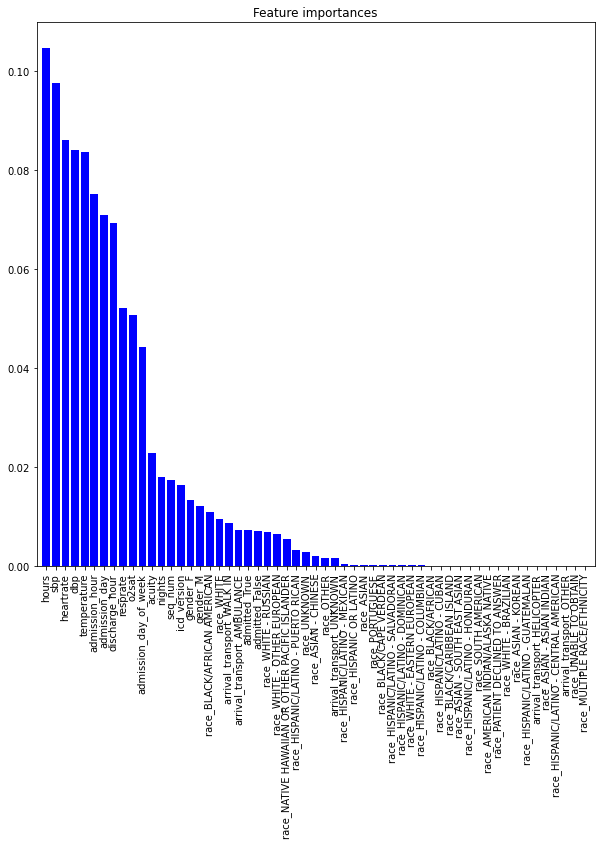

In [31]:
# plot the feature importance 
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

- The F1 score is higher than simple decision tree model, which is reasonable 
- Both tree model has shown the possibility of predicting the disposition of patients


## Support Vector Classifier

In [18]:
# SVC
from sklearn.svm import SVC

SVC = SVC(random_state=42)
SVC.fit(X_train, y_train)

# predict the test set
y_pred = SVC.predict(X_test)
# print the classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999    172663
           1     0.0000    0.0000    0.0000        36

    accuracy                         0.9998    172699
   macro avg     0.4999    0.5000    0.4999    172699
weighted avg     0.9996    0.9998    0.9997    172699



d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Support Vector Machine (SVC) has a super bad performance.
- This could be due to the fact that lack of Hyperparameter tuning.
- Or simply the problem cannot be solved by multidimensional hyperplane.

## LDA 


In [19]:
# LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldac = LinearDiscriminantAnalysis()
ldac.fit(X_train, y_train)

y_pred = ldac.predict(X_test)
# print the classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9989    0.9994    172663
           1     0.0000    0.0000    0.0000        36

    accuracy                         0.9987    172699
   macro avg     0.4999    0.4995    0.4997    172699
weighted avg     0.9996    0.9987    0.9991    172699



- Again, bad performance on the minority class (disposition_binary = 1)
- This could also be due to the problem cannot be solved by a linear model
- Or lack of hyperparameter tuning

## XGBoost

In [20]:
## Import XGBoost 
from xgboost import XGBClassifier

xgbc = XGBClassifier(random_state=42)
xgbc.fit(X_train, y_train) 
y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))


d:\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
d:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
d:\anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[03:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    172663
           1     1.0000    0.9167    0.9565        36

    accuracy                         1.0000    172699
   macro avg     1.0000    0.9583    0.9783    172699
weighted avg     1.0000    1.0000    1.0000    172699



- Compare with other model, XGBoost can a better performance (in terms of the f1-score)
- This also indicating that the model is learning instead of random guessing

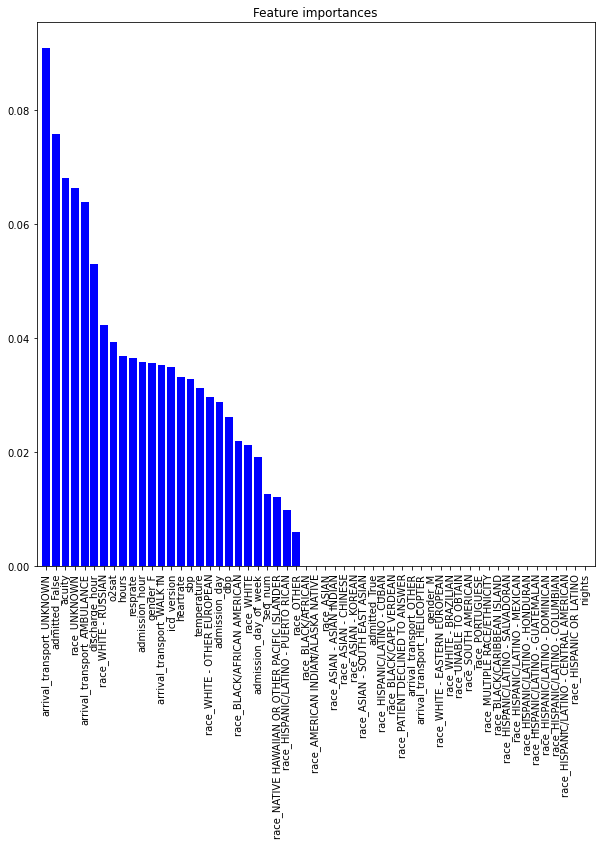

In [32]:
# plot the feature importance
importances = xgbc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")   
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Summary

- The traditional machine learning models showed the possibility of predicting the outcome of the patients.
- Random Forest Classifier and XGBoost are able learn the data and predict the outcome of the patients.
- Even though the model performance is not better than the null model, it is still possible to predict the outcome of the patients.
- Belives that the hyperparameter tuning slightly improves the model performance.

## Next Steps
- Can try some data balance techniques to improve the model performance. (SMOTE, ADASYN)
- Hyperparameter tuning can be done to improve the model performance.
- Could look at more complex models to see if we can improve the performance 
- Will put more effort on Nerual Networks as suggested 
- The next model will be built with all features (including nlp features on text data)
- Feature Importance would also be another important aspect to look at (SHAP)